# This is bird dataset builder
    ## Amit

In [28]:
import csv
rows = []
with open("sample.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(rows)

[['Abroscopus albogularis'], ['Abroscopus schisticeps'], ['Abroscopus superciliaris']]


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastbook import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return search_images_ddg(term,max_images)


In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'http://1.bp.blogspot.com/-Q7sGZQI1y0E/UZiBw-jW1qI/AAAAAAAAUbA/xsozkZfUlX8/s1600/Bird-Flower-Branch-1200.jpg'

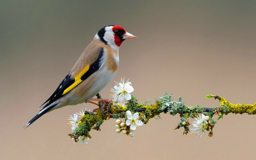

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [46]:
# searches = 'Haliastur indus','Abroscopus albogularis'
dpath = Path('indian_birds')
from time import sleep
dpath.mkdir(exist_ok=True, parents=True)

import csv
rows = []
with open("ibird.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    print(type(csvreader))
    for row in csvreader:
        dest = Path('.'+'/'+row[0])
        download_images(dest, urls=search_images(f'{row[0]}',30))
        sleep(10)


<class '_csv.reader'>
Searching for 'Abroscopus albogularis'
Searching for 'Abroscopus schisticeps'
Searching for 'Abroscopus superciliaris'
Searching for 'Accipiter badius'
Searching for 'Accipiter butleri'
Searching for 'Accipiter gentilis'
Searching for 'Accipiter gularis'
Searching for 'Accipiter nisus'
Searching for 'Accipiter soloensis'
Searching for 'Accipiter trivirgatus'
Searching for 'Accipiter virgatus'
Searching for 'Aceros nipalensis'
Searching for 'Acridotheres fuscus'
Searching for 'Acridotheres ginginianus'
Searching for 'Acridotheres grandis'
Searching for 'Acridotheres tristis'
Searching for 'Acrocephalus agricola'
Searching for 'Acrocephalus arundinaceus'
Searching for 'Acrocephalus bistrigiceps'
Searching for 'Acrocephalus concinens'
Searching for 'Acrocephalus dumetorum'
Searching for 'Acrocephalus melanopogon'
Searching for 'Acrocephalus orientalis'
Searching for 'Acrocephalus stentoreus'
Searching for 'Actinodura cyanouroptera'
Searching for 'Actinodura egertoni'

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [22]:
fns = get_image_files(dpath)

In [21]:
for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [44]:
??Path